#**Car Price Prediction.**

In this iPython Notebook, I have created basic Car Price Prediction with Python.

It is an extension from the project: https://github.com/bharathmbb6263/Car-Price-Prediction.

The Dataset used is subset of Kaggle Dataset.



In [1]:
#Importing necessary libraries and understanding the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('/content/car_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading and Understanding the dataset**

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# **Data Preprocessing**

In [8]:
df['Age']=2022-df['Year']
df.drop('Year', axis=1, inplace=True)

In [9]:
df.rename(columns={'Owner':'Past_Owner'}, inplace=True)

# EDA

In [10]:
#Univariate Analysis
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Past_Owner', 'Age'],
      dtype='object')

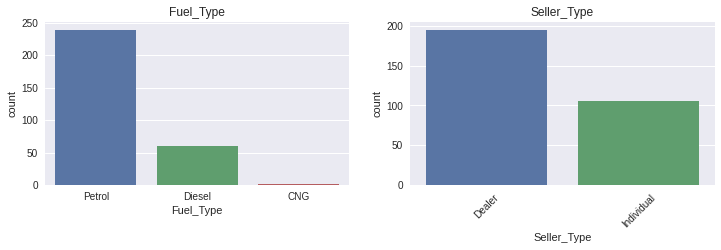

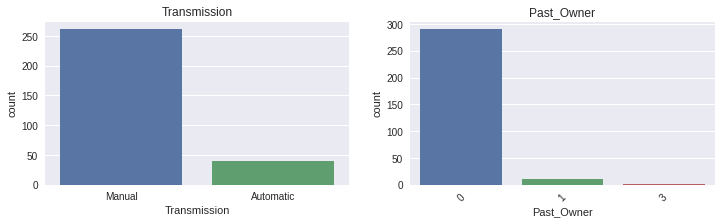

In [11]:
categorical_columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owner']
i=0
while i<4:
    fig=plt.figure(figsize=[12,3])
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    
    ax1.title.set_text(categorical_columns[i])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical_columns[i], data=df)
    i+=1
    
    ax2.title.set_text(categorical_columns[i])
    plt.subplot(1,2,2)
    sns.countplot(x=categorical_columns[i], data=df)
    i+=1

    plt.xticks(rotation = 45)
    plt.show()

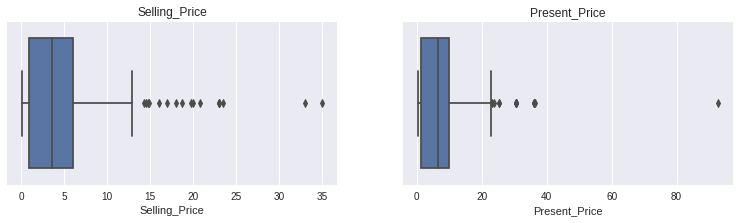

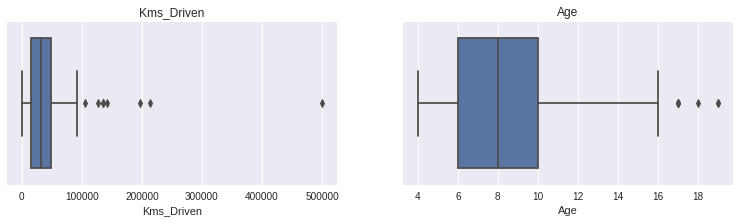

In [12]:
numerical_columns = ['Selling_Price','Present_Price','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.title.set_text(numerical_columns[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical_columns[i], data=df)
    i += 1
    
    ax2.title.set_text(numerical_columns[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical_columns[i], data=df)
    i += 1
    
    plt.show()

In [13]:
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [14]:
df[df['Selling_Price']>df['Selling_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,7
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [15]:
df[df['Kms_Driven']>df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,17
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,12
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,14


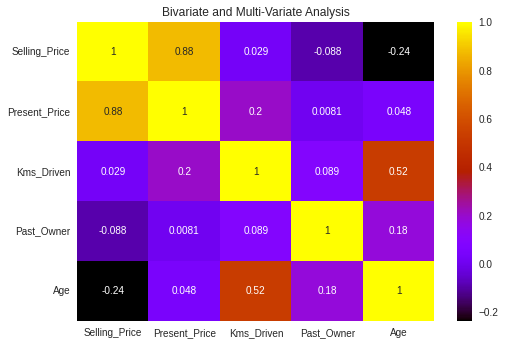

In [16]:
#Bivariate and Multi-Variate Analysis
sns.heatmap(df.corr(), annot=True, cmap='gnuplot')
plt.title("Bivariate and Multi-Variate Analysis")
plt.show()

In [17]:
df.corr()['Selling_Price']

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Past_Owner      -0.088344
Age             -0.236141
Name: Selling_Price, dtype: float64

In [18]:
df.corr()['Present_Price']

Selling_Price    0.878983
Present_Price    1.000000
Kms_Driven       0.203647
Past_Owner       0.008057
Age              0.047584
Name: Present_Price, dtype: float64

In [19]:
df.pivot_table(values='Selling_Price', index='Seller_Type', columns='Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [20]:
df.pivot_table(values='Selling_Price', index='Seller_Type', columns='Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


# **Data Preparation**
**Creating dummie variables for categorical features**

In [21]:
df.drop(labels='Car_Name', axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [22]:
df=pd.get_dummies(data=df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Past_Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


**Splitting dataset int otrain and test subsets**

In [23]:
y=df['Selling_Price']
X=df.drop('Selling_Price', axis=1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


# **Creating models (Evaluation)**

##**Regression models**

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [28]:
cv=[]
r2_train=[]
r2_test=[]

def car_pred_model(model, model_name):
    model.fit(x_train, y_train)
    
    #Calculating r2 score of train subset
    y_pred_train=model.predict(x_train)
    r2_train_model=r2_score(y_train, y_pred_train)
    r2_train.append(round(r2_train_model, 2))
    
    #Calculating r2 score of test subset
    y_pred_test=model.predict(x_test)
    r2_test_model=r2_score(y_test, y_pred_test)
    r2_test.append(round(r2_test_model,2))
    
    #r2 mean of train subset using Cross Validation
    cross_val=cross_val_score(model, x_train, y_train, cv=5)
    cv_mean=cross_val.mean()
    cv.append(round(cv_mean, 2))
    
    print("Train r2 score: ", round(r2_train_model,2))
    print("Test r2 score: ", round(r2_test_model,2))
    print("Train cv scores: ",cross_val)
    print("Train cv mean: ", round(cv_mean,2))
    
    #Plotting graphs
    fig, ax= plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    #Y_test VS. Y_train scatter plot
    ax[1].set_title('y_test VS. y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#**Linear Regression**

Train r2 score:  0.88
Test r2 score:  0.86
Train cv scores:  [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train cv mean:  0.84


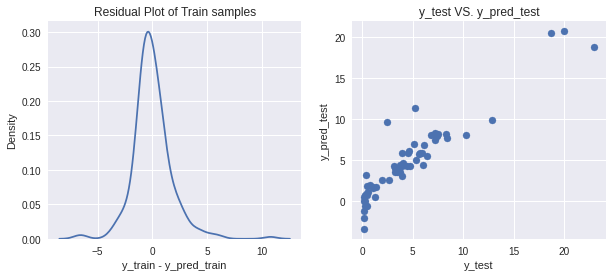

In [29]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
car_pred_model(lr, "Linear_regressor.pkl")

#**Ridge**

Train r2 score:  0.88
Test r2 score:  0.86
Train cv scores:  [0.89911673 0.8983878  0.82980715 0.81769305 0.73377277]
Train cv mean:  0.84


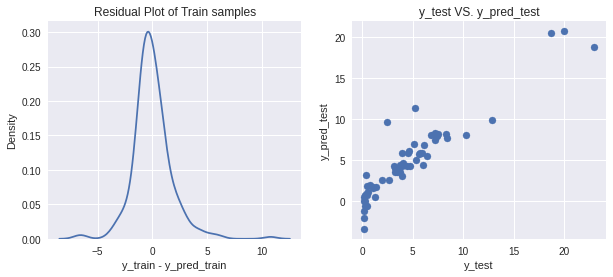

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

#Creating Ridge model object
rg=Ridge()
#Range of Alpha
alpha = np.logspace(-3,3,num=14)

#Creating Randomized Search CV in order to find the best estimator of hyperparameter
rg_rs=RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))

car_pred_model(rg_rs, "ridge.pkl")

#**Lasso**

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls=Lasso()
alpha=np.logspace(-3,3,num=14) #range for alpha

ls_rs=RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))

Train r2 score:  0.88
Test r2 score:  0.86
Train cv scores:  [0.89913828 0.89975361 0.83196652 0.81785432 0.70210321]
Train cv mean:  0.83


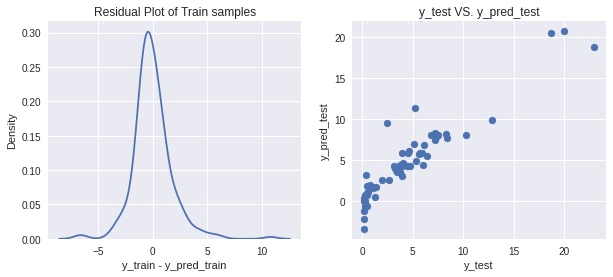

In [32]:
car_pred_model(ls_rs,'lasso.pkl')

#**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train r2 score:  0.95
Test r2 score:  0.83
Train cv scores:  [0.87838382 0.96645285 0.84913314 0.89171388 0.73489814]
Train cv mean:  0.86


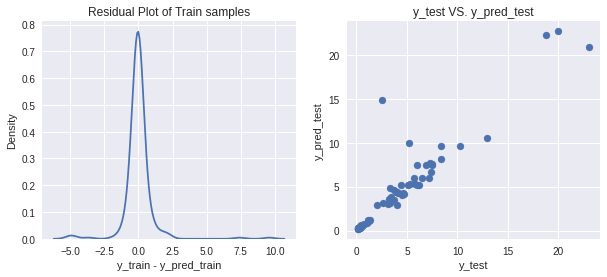

In [34]:
car_pred_model(rf_rs,'random_forest.pkl')

In [35]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_split=8, n_estimators=800)


#**Gradient Boosting**

In [36]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb=GradientBoostingRegressor()

#Rate at which correcting is made
learning_rate=[0.001, 0.01, 0.1, 0.2]
#Number of trees in Gradient Boosting
n_estimators=list(range(500,1000,100))
#Maxiumum number of levels in a tree
max_depth=list(range(4,9,4))
#Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
#Minimum number of samples required to be at a leaf node
min_samples_leaf=[1,2,5,7]
#Number of features to be consdered at each split
max_features=['auto', 'sqrt']

#Hyperparameters dict
param_grid={"learning_rate": learning_rate, "n_estimators":n_estimators, "max_depth": max_depth, "min_samples_split":min_samples_split, "min_samples_leaf": min_samples_leaf, "max_features": max_features}

gb_rs=RandomizedSearchCV(estimator=gb, param_distributions=param_grid)

Train r2 score:  1.0
Test r2 score:  0.94
Train cv scores:  [0.91969886 0.90592573 0.86817363 0.94210525 0.67661495]
Train cv mean:  0.86


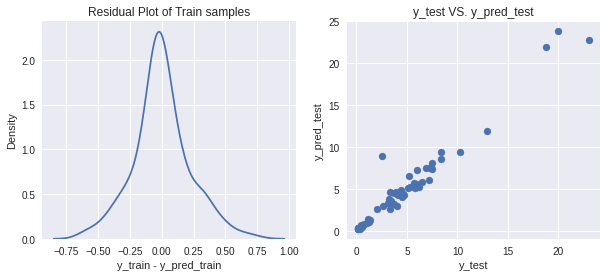

In [37]:
car_pred_model(gb_rs, "gradient_boosting.pkl")

#**Comperision Of All Regression Models**

In [43]:
Technique=['LinearRegression', "Ridge", "Lasso", "RandomForestRegressor", "GradientBoostingRegressor"]
stats=pd.DataFrame({'Model':Technique, "R Squared(Train)": r2_train, "R Squared(Test)":r2_test, "CV score mean (train)":cv})
display(stats)

,Model,R Squared(Train),R Squared(Test),CV score mean (train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.95,0.83,0.86
4,GradientBoostingRegressor,1.00,0.94,0.86


#**Thank You :)**